In [1]:
# Importing libraries

import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
## The path where we have datasets
print(os.listdir("./data"))

['2019-01-07_tweets.csv', '2019-01-07_weather.csv', 'tweets.csv', 'weather.csv']


In [35]:
weather = pd.read_csv(
    './data/weather.csv',
    index_col='time',infer_datetime_format=True,
    parse_dates=['time'] )

tweets = pd.read_csv(
    './data/tweets.csv',
    index_col='time',infer_datetime_format=True,
    parse_dates=['time'] )
tweets

,GB_Pos,GB_Neg,GB_Neu,GB_Total,US_Pos,US_Neg,US_Neu,US_Total,JP_Pos,JP_Neg,JP_Neu,JP_Total
time,,,,,,,,,,,,
2018-12-27 20:45:43.149,2,0,1,3,2,0,1,3,0,0,3,3
2018-12-27 20:45:48.447,2,0,2,4,0,1,4,5,0,0,1,1
2018-12-27 20:45:53.823,1,0,2,3,2,1,7,10,0,0,2,2
2018-12-27 20:45:59.153,0,0,2,2,3,0,2,5,0,0,1,1
2018-12-27 20:46:04.791,1,0,0,1,2,2,4,8,0,0,0,0
2018-12-27 20:46:10.299,2,0,0,2,1,0,4,5,0,0,0,0
2018-12-27 20:46:16.693,1,0,2,3,2,0,2,4,0,0,0,0
2018-12-27 20:46:21.778,1,0,1,2,2,0,6,8,0,0,2,2
2018-12-27 20:46:27.341,0,1,1,2,3,1,4,8,0,0,2,2


In [68]:
plt.figure(figsize=(20, 10))
weather=weather.asfreq('30S')
grouped=weather.groupby('city')
print grouped
for name, data in grouped:
    dat=data['pressure']
    dat.plot(label =name) 
plt.ylabel('pressure')
plt.legend()
plt.show()

ValueError: cannot reindex from a duplicate axis

<Figure size 1440x720 with 0 Axes>

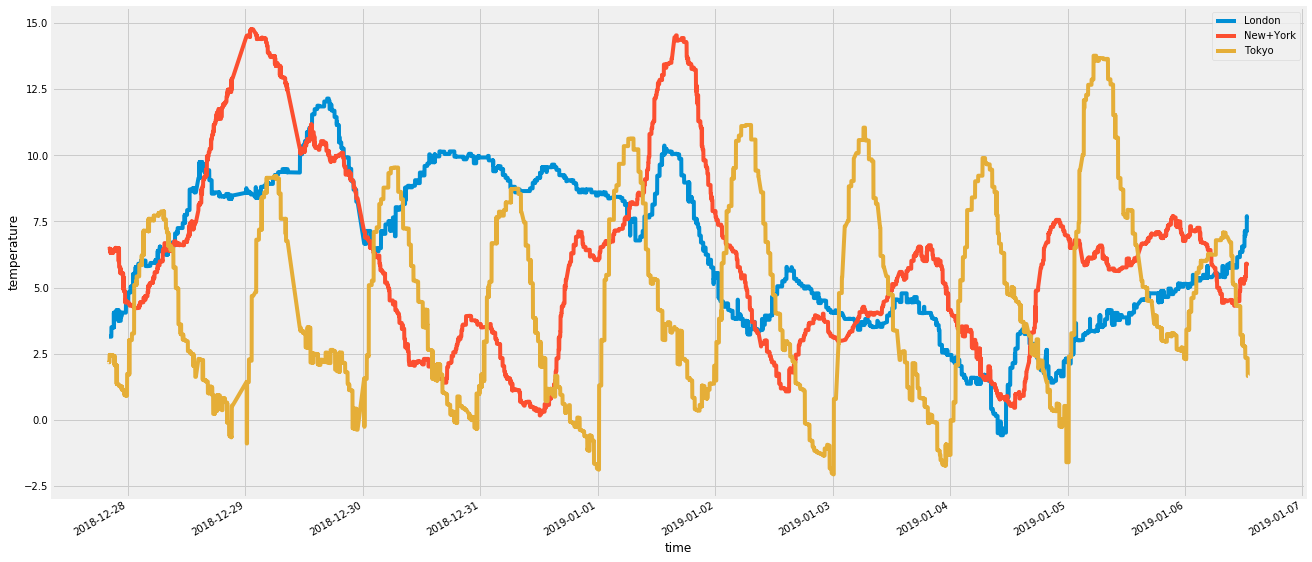

In [34]:
plt.figure(figsize=(20, 10))
for name, data in grouped:
    dat=data['temperature']-273#.interpolate(method='cubic')#convert to celsius
    dat.plot(label =name) 
plt.ylabel('temperature')
plt.legend()
plt.show()

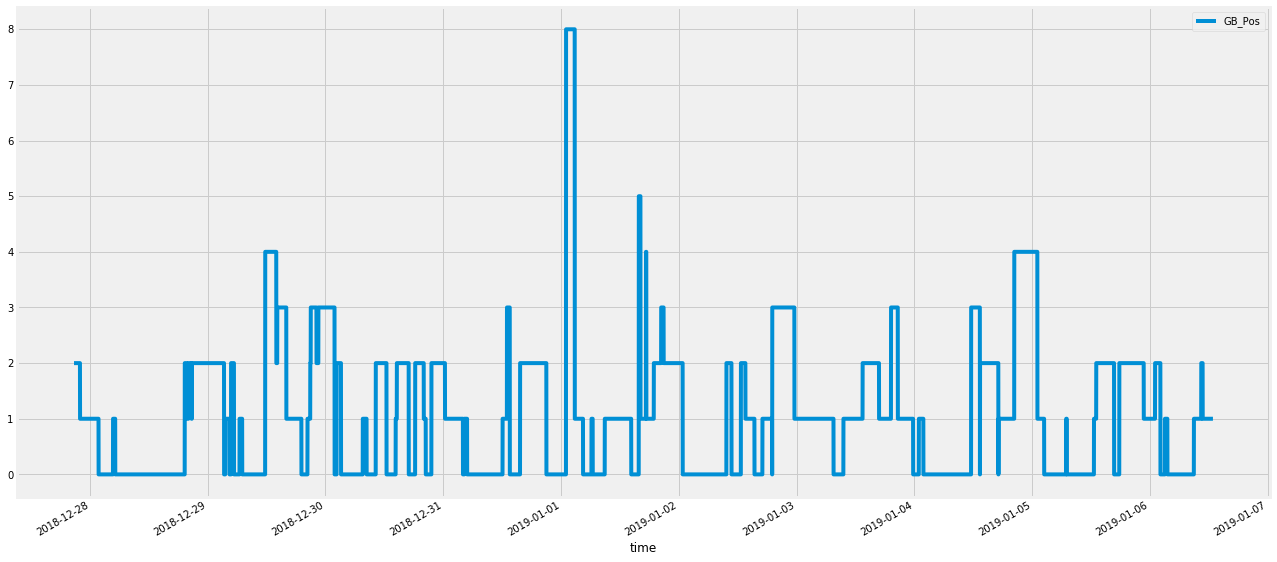

In [59]:
plt.figure(figsize=(20, 10))
tweets['GB_Pos'].asfreq('s').ffill().plot()

plt.legend()
plt.show()